In [1]:
# prompt: connect with kaggle

!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d alaahussien/diabetic-eye

Dataset URL: https://www.kaggle.com/datasets/alaahussien/diabetic-eye
License(s): unknown
100% 352M/354M [00:20<00:00, 23.4MB/s]
100% 354M/354M [00:20<00:00, 18.1MB/s]


In [3]:
# prompt: unzip

!unzip /content/diabetic-eye.zip


Archive:  /content/diabetic-eye.zip
  inflating: data/test/0/12362_left.jpeg  
  inflating: data/test/0/12362_right.jpeg  
  inflating: data/test/0/12378_right.jpeg  
  inflating: data/test/0/12395_left.jpeg  
  inflating: data/test/0/12395_right.jpeg  
  inflating: data/test/0/12399_right.jpeg  
  inflating: data/test/0/1240_left.jpeg  
  inflating: data/test/0/1240_right.jpeg  
  inflating: data/test/0/12417_left.jpeg  
  inflating: data/test/0/12417_right.jpeg  
  inflating: data/test/0/12425_left.jpeg  
  inflating: data/test/0/12425_right.jpeg  
  inflating: data/test/0/12428_left.jpeg  
  inflating: data/test/0/12428_right.jpeg  
  inflating: data/test/0/1242_left.jpeg  
  inflating: data/test/0/1242_right.jpeg  
  inflating: data/test/0/12433_left.jpeg  
  inflating: data/test/0/12433_right.jpeg  
  inflating: data/test/0/12447_left.jpeg  
  inflating: data/test/0/12447_right.jpeg  
  inflating: data/test/0/12452_right.jpeg  
  inflating: data/test/0/12461_right.jpeg  
  inflati

In [4]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [5]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [6]:

def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [7]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [8]:
def vall_df(val_path):
    classes, class_paths = zip(*[(label, os.path.join(val_path, label, image))
                                 for label in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, label))
                                 for image in os.listdir(os.path.join(val_path, label))])

    val_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return val_df

In [9]:
tr_df = train_df('/content/data/training')

In [10]:
tr_df

Class Path Class
0     /content/data/training/4/10904_right.jpeg     4
1      /content/data/training/4/28072_left.jpeg     4
2     /content/data/training/4/33906_right.jpeg     4
3      /content/data/training/4/23326_left.jpeg     4
4     /content/data/training/4/19116_right.jpeg     4
...                                         ...   ...
1654   /content/data/training/3/18235_left.jpeg     3
1655  /content/data/training/3/32247_right.jpeg     3
1656   /content/data/training/3/27768_left.jpeg     3
1657   /content/data/training/3/24656_left.jpeg     3
1658   /content/data/training/3/28129_left.jpeg     3

[1659 rows x 2 columns]

In [11]:
ts_df = test_df('/content/data/test')

In [12]:
ts_df

Class Path Class
0      /content/data/test/4/7992_left.jpeg     4
1    /content/data/test/4/41387_right.jpeg     4
2      /content/data/test/4/4793_left.jpeg     4
3     /content/data/test/4/8087_right.jpeg     4
4      /content/data/test/4/9311_left.jpeg     4
..                                     ...   ...
555    /content/data/test/3/8284_left.jpeg     3
556   /content/data/test/3/7883_right.jpeg     3
557   /content/data/test/3/41714_left.jpeg     3
558    /content/data/test/3/6736_left.jpeg     3
559  /content/data/test/3/43633_right.jpeg     3

[560 rows x 2 columns]

In [13]:
val_df = vall_df('/content/data/validation')

In [14]:
val_df

Class Path Class
0     /content/data/validation/4/38325_left.jpeg     4
1     /content/data/validation/4/38345_left.jpeg     4
2     /content/data/validation/4/37834_left.jpeg     4
3    /content/data/validation/4/35112_right.jpeg     4
4    /content/data/validation/4/38325_right.jpeg     4
..                                           ...   ...
545   /content/data/validation/3/35124_left.jpeg     3
546   /content/data/validation/3/35850_left.jpeg     3
547  /content/data/validation/3/37032_right.jpeg     3
548    /content/data/validation/3/3422_left.jpeg     3
549   /content/data/validation/3/34666_left.jpeg     3

[550 rows x 2 columns]

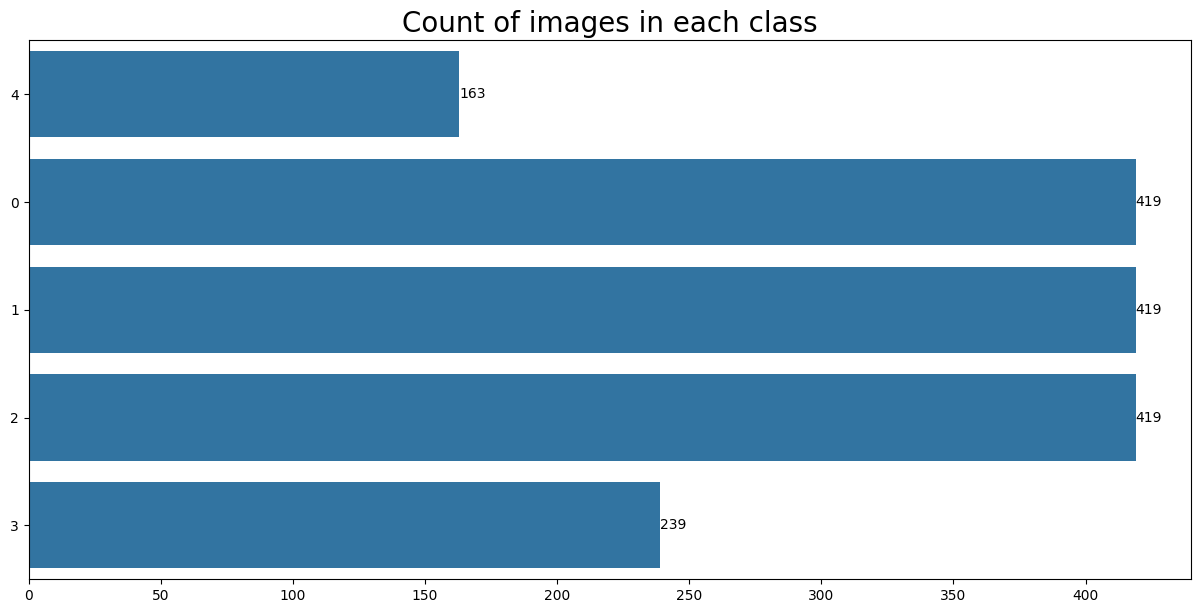

In [15]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

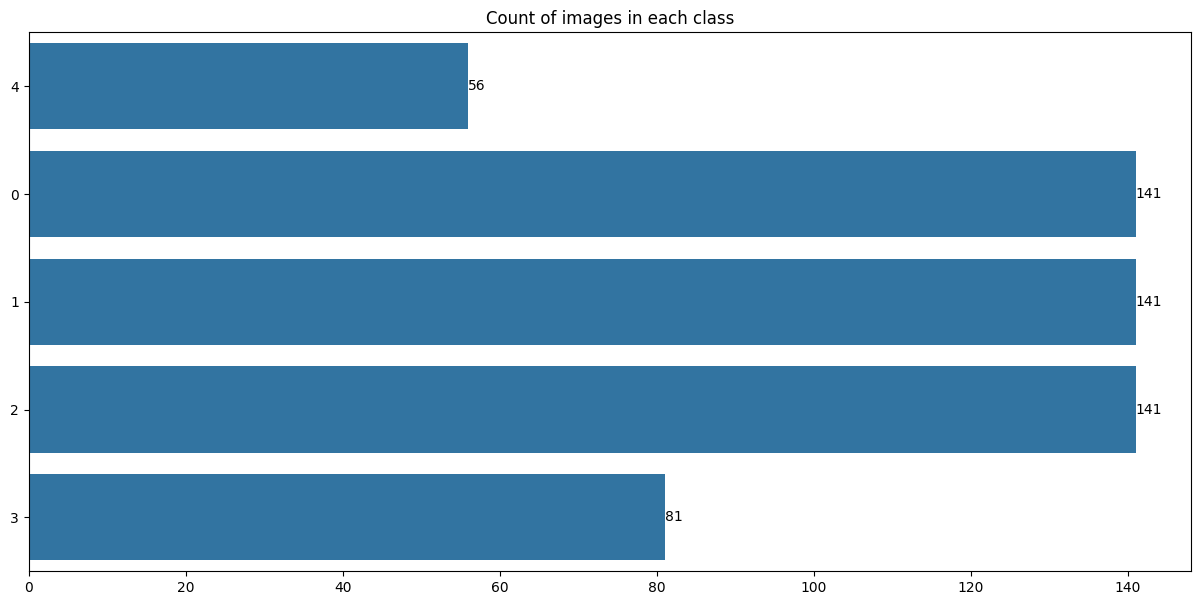

In [16]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'])

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

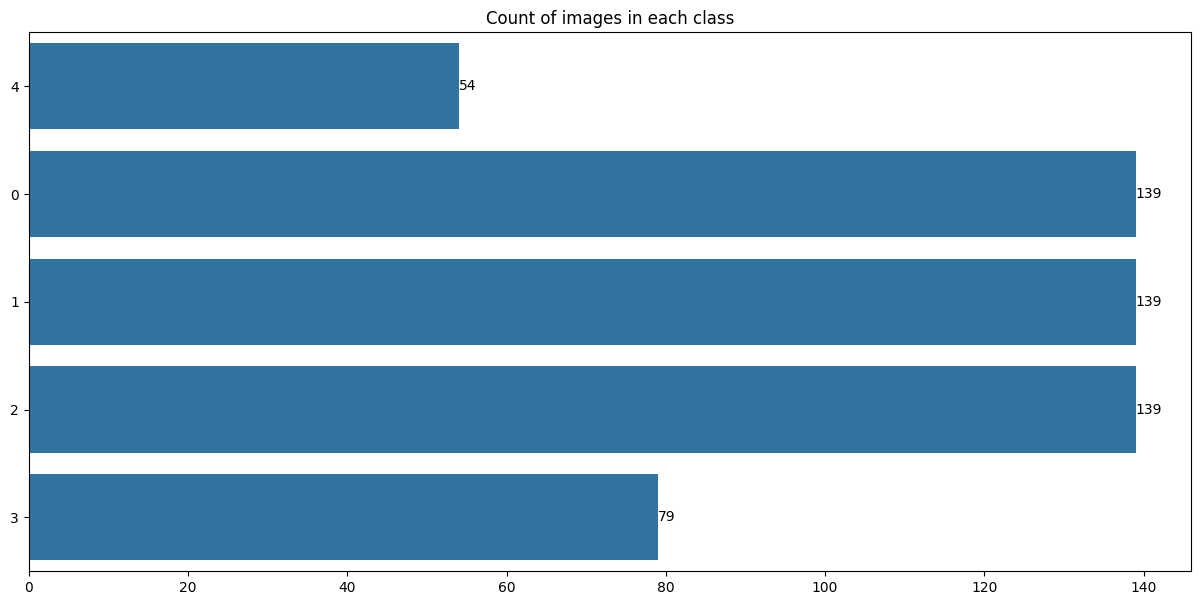

In [17]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=val_df['Class'])

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [18]:
def load_image(img_path):
    return Image.open(img_path).convert("RGB")

In [19]:
img_resolutions = []
for img_path in tr_df['Class Path'] :
    img = load_image(img_path)
    img_resolutions.append(img.size)
img_resolutions = np.array(img_resolutions)

In [20]:
print("Train Dataset")
min_resolution = np.min(img_resolutions, axis=0)
max_resolution = np.max(img_resolutions, axis=0)
mean_resolution = np.mean(img_resolutions, axis=0, dtype=np.int32)
median_resolution = np.median(img_resolutions, axis=0)

print("Minimum image width:", min_resolution[0])
print("Minimum image height:", min_resolution[1])
print("Maximum image width:", max_resolution[0])
print("Maximum image height:", max_resolution[1])
print(f"Mean image resolution: {mean_resolution[0]}x{mean_resolution[1]}")
print(f"Median image resolution: {median_resolution[0]}x{median_resolution[1]}")

Train Dataset
Minimum image width: 512
Minimum image height: 352
Maximum image width: 512
Maximum image height: 661
Mean image resolution: 512x507
Median image resolution: 512.0x510.0


In [21]:
img_resolutions = []
for img_path in ts_df['Class Path'] :
    img = load_image(img_path)
    img_resolutions.append(img.size)
img_resolutions = np.array(img_resolutions)

In [22]:
print("Test Dataset")
min_resolution = np.min(img_resolutions, axis=0)
max_resolution = np.max(img_resolutions, axis=0)
mean_resolution = np.mean(img_resolutions, axis=0, dtype=np.int32)
median_resolution = np.median(img_resolutions, axis=0)

print("Minimum image width:", min_resolution[0])
print("Minimum image height:", min_resolution[1])
print("Maximum image width:", max_resolution[0])
print("Maximum image height:", max_resolution[1])
print(f"Mean image resolution: {mean_resolution[0]}x{mean_resolution[1]}")
print(f"Median image resolution: {median_resolution[0]}x{median_resolution[1]}")

Test Dataset
Minimum image width: 512
Minimum image height: 395
Maximum image width: 512
Maximum image height: 522
Mean image resolution: 512x508
Median image resolution: 512.0x510.0


In [23]:
img_resolutions = []
for img_path in val_df['Class Path'] :
    img = load_image(img_path)
    img_resolutions.append(img.size)
img_resolutions = np.array(img_resolutions)

In [24]:
print("Validation Dataset")
min_resolution = np.min(img_resolutions, axis=0)
max_resolution = np.max(img_resolutions, axis=0)
mean_resolution = np.mean(img_resolutions, axis=0, dtype=np.int32)
median_resolution = np.median(img_resolutions, axis=0)

print("Minimum image width:", min_resolution[0])
print("Minimum image height:", min_resolution[1])
print("Maximum image width:", max_resolution[0])
print("Maximum image height:", max_resolution[1])
print(f"Mean image resolution: {mean_resolution[0]}x{mean_resolution[1]}")
print(f"Median image resolution: {median_resolution[0]}x{median_resolution[1]}")

Validation Dataset
Minimum image width: 512
Minimum image height: 342
Maximum image width: 512
Maximum image height: 550
Mean image resolution: 512x507
Median image resolution: 512.0x510.0


In [25]:
import shutil
import os

# Define the source (Kaggle input) and destination (Kaggle working) paths
input_dir = '/content/data'
working_dir = '/content/diabetic'

# Ensure the destination folder exists
os.makedirs(working_dir, exist_ok=True)

# Copy the entire directory from input to working
shutil.copytree(input_dir, working_dir, dirs_exist_ok=True)  # dirs_exist_ok=True will not raise an error if the directory exists


'/content/diabetic'

In [26]:
!pip install Augmentor

In [27]:
import Augmentor
import os
import shutil

# Path to the dataset folder containing class subfolders
dataset_path = "/content/diabetic/training"
output_folder_name = "output"

# Target number of images for all classes
target_num_images = 1000

# Loop through each class folder in the dataset path
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    # Check if it's a directory (class folder)
    if not os.path.isdir(class_folder):
        continue

    # Get the current number of images in the class folder
    current_num_images = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])

    # Determine the number of images needed for this class
    if current_num_images >= target_num_images:
        print(f"Class {class_name} already has {current_num_images} images. No augmentation needed.")
        continue

    num_images_to_generate = target_num_images - current_num_images
    print(f"Processing class: {class_name} - Generating {num_images_to_generate} additional images.")

    # Create Augmentor pipeline for the current class
    p = Augmentor.Pipeline(class_folder)

    # Apply augmentations
    p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)

    # Generate the required number of augmented images
    p.sample(num_images_to_generate)

    # Path to the output folder created by Augmentor
    output_folder = os.path.join(class_folder, output_folder_name)

    # Move the augmented images to the original class folder
    for filename in os.listdir(output_folder):
        src = os.path.join(output_folder, filename)
        dst = os.path.join(class_folder, filename)
        shutil.move(src, dst)  # Move file to the class folder

    # Remove the output folder after moving the images
    shutil.rmtree(output_folder)
    print(f"Completed processing class: {class_name}")

print("Augmentation and file moving process complete.")


Processing class: 4 - Generating 837 additional images.
Initialised with 163 image(s) found.
Output directory set to /content/diabetic/training/4/output.

Processing <PIL.Image.Image image mode=RGB size=512x391 at 0x7928CBD6A150>: 100%|██████████| 837/837 [00:22<00:00, 37.04 Samples/s]


Completed processing class: 4
Processing class: 0 - Generating 581 additional images.
Initialised with 419 image(s) found.
Output directory set to /content/diabetic/training/0/output.

Processing <PIL.Image.Image image mode=RGB size=512x508 at 0x7928C9C15550>: 100%|██████████| 581/581 [00:13<00:00, 44.14 Samples/s]


Completed processing class: 0
Processing class: 1 - Generating 581 additional images.
Initialised with 419 image(s) found.
Output directory set to /content/diabetic/training/1/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7928CC053790>: 100%|██████████| 581/581 [00:14<00:00, 38.81 Samples/s]


Completed processing class: 1
Processing class: 2 - Generating 581 additional images.
Initialised with 419 image(s) found.
Output directory set to /content/diabetic/training/2/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7928C9BD1C10>: 100%|██████████| 581/581 [00:14<00:00, 39.09 Samples/s]


Completed processing class: 2
Processing class: 3 - Generating 761 additional images.
Initialised with 239 image(s) found.
Output directory set to /content/diabetic/training/3/output.

Processing <PIL.Image.Image image mode=RGB size=512x511 at 0x7928CBD2EDD0>: 100%|██████████| 761/761 [00:19<00:00, 39.73 Samples/s]


Completed processing class: 3
Augmentation and file moving process complete.


In [28]:
tr_df = train_df('/content/diabetic/training')

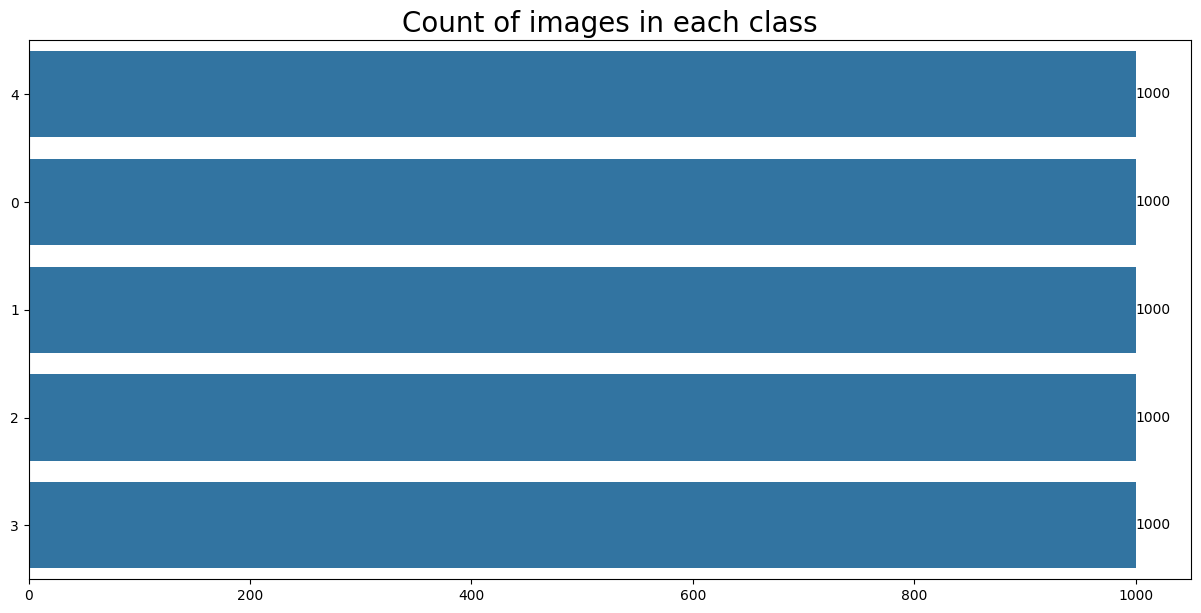

In [29]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [30]:
import Augmentor
import os
import shutil

# Path to the dataset folder containing class subfolders
dataset_path = "/content/diabetic/test"
output_folder_name = "output"

# Dictionary to specify the number of images to generate for each class
selected_classes = {
    '3': 60,  # Generate 100 augmented images for class "3"
    '4': 85   # Generate 150 augmented images for class "4"
}

# Loop through each class folder in the dataset path
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    # Skip if the class is not in the selected_classes dictionary
    if class_name not in selected_classes:
        print(f"Skipping class: {class_name}")
        continue

    if os.path.isdir(class_folder):  # Check if it's a directory (class folder)
        print(f"Processing class: {class_name}")

        # Get the number of augmented images for this class
        num_images = selected_classes[class_name]

        # Create Augmentor pipeline for the current class
        p = Augmentor.Pipeline(class_folder)

        # Apply augmentations
        p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
        p.flip_left_right(probability=0.5)

        # Generate augmented images
        p.sample(num_images)

        # Path to the output folder created by Augmentor
        output_folder = os.path.join(class_folder, output_folder_name)

        # Move the augmented images to the original class folder
        for filename in os.listdir(output_folder):
            src = os.path.join(output_folder, filename)
            dst = os.path.join(class_folder, filename)
            shutil.move(src, dst)  # Move file to the class folder

        # Remove the output folder after moving the images
        shutil.rmtree(output_folder)
        print(f"Completed processing class: {class_name}")

print("Augmentation and file moving process complete.")


Processing class: 4
Initialised with 56 image(s) found.
Output directory set to /content/diabetic/test/4/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x79292428E210>: 100%|██████████| 85/85 [00:02<00:00, 40.86 Samples/s]


Completed processing class: 4
Skipping class: 0
Skipping class: 1
Skipping class: 2
Processing class: 3
Initialised with 81 image(s) found.
Output directory set to /content/diabetic/test/3/output.

Processing <PIL.Image.Image image mode=RGB size=512x511 at 0x7928C9BD6950>: 100%|██████████| 60/60 [00:01<00:00, 49.82 Samples/s]

Completed processing class: 3
Augmentation and file moving process complete.


In [31]:
te_df = test_df('/content/diabetic/test')

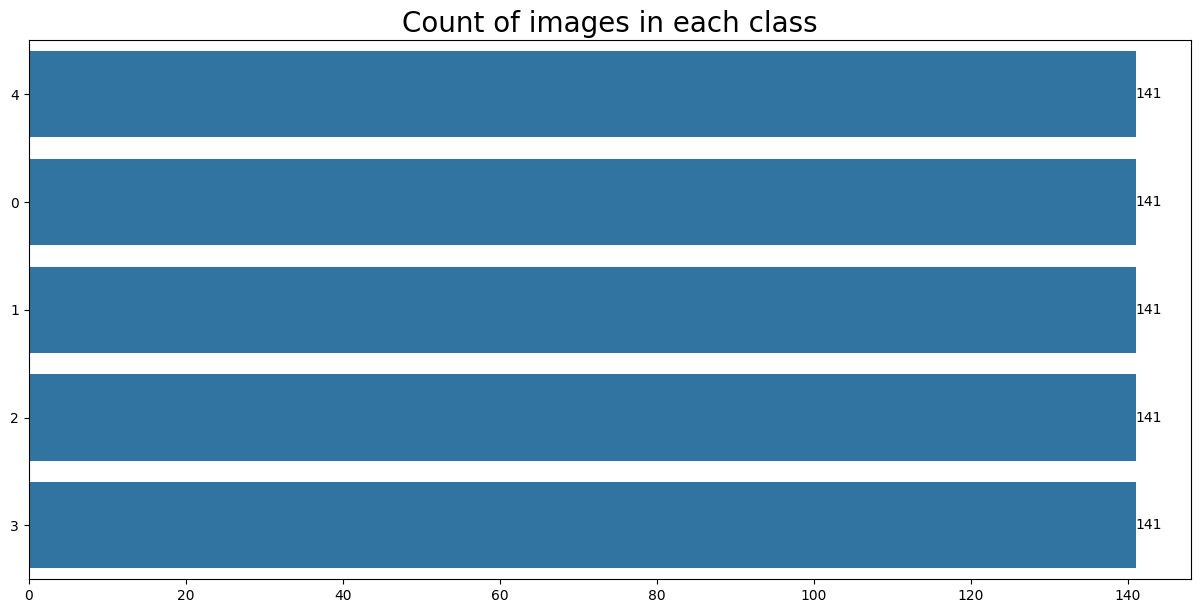

In [32]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=te_df , y=te_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [33]:
import Augmentor
import os
import shutil

# Path to the dataset folder containing class subfolders
dataset_path = "/content/diabetic/validation"
output_folder_name = "output"

# Dictionary to specify the number of images to generate for each class
selected_classes = {
    '3': 60,  # Generate 100 augmented images for class "3"
    '4': 85   # Generate 150 augmented images for class "4"
}

# Loop through each class folder in the dataset path
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    # Skip if the class is not in the selected_classes dictionary
    if class_name not in selected_classes:
        print(f"Skipping class: {class_name}")
        continue

    if os.path.isdir(class_folder):  # Check if it's a directory (class folder)
        print(f"Processing class: {class_name}")

        # Get the number of augmented images for this class
        num_images = selected_classes[class_name]

        # Create Augmentor pipeline for the current class
        p = Augmentor.Pipeline(class_folder)

        # Apply augmentations
        p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
        p.flip_left_right(probability=0.5)

        # Generate augmented images
        p.sample(num_images)

        # Path to the output folder created by Augmentor
        output_folder = os.path.join(class_folder, output_folder_name)

        # Move the augmented images to the original class folder
        for filename in os.listdir(output_folder):
            src = os.path.join(output_folder, filename)
            dst = os.path.join(class_folder, filename)
            shutil.move(src, dst)  # Move file to the class folder

        # Remove the output folder after moving the images
        shutil.rmtree(output_folder)
        print(f"Completed processing class: {class_name}")

print("Augmentation and file moving process complete.")


Processing class: 4
Initialised with 54 image(s) found.
Output directory set to /content/diabetic/validation/4/output.

Processing <PIL.Image.Image image mode=RGB size=512x510 at 0x7928C9C0BE90>: 100%|██████████| 85/85 [00:01<00:00, 59.15 Samples/s]


Completed processing class: 4
Skipping class: 0
Skipping class: 1
Skipping class: 2
Processing class: 3
Initialised with 79 image(s) found.
Output directory set to /content/diabetic/validation/3/output.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7928CBDA5390>: 100%|██████████| 60/60 [00:00<00:00, 61.52 Samples/s]

Completed processing class: 3
Augmentation and file moving process complete.


In [34]:
val_df = vall_df('/content/diabetic/validation')

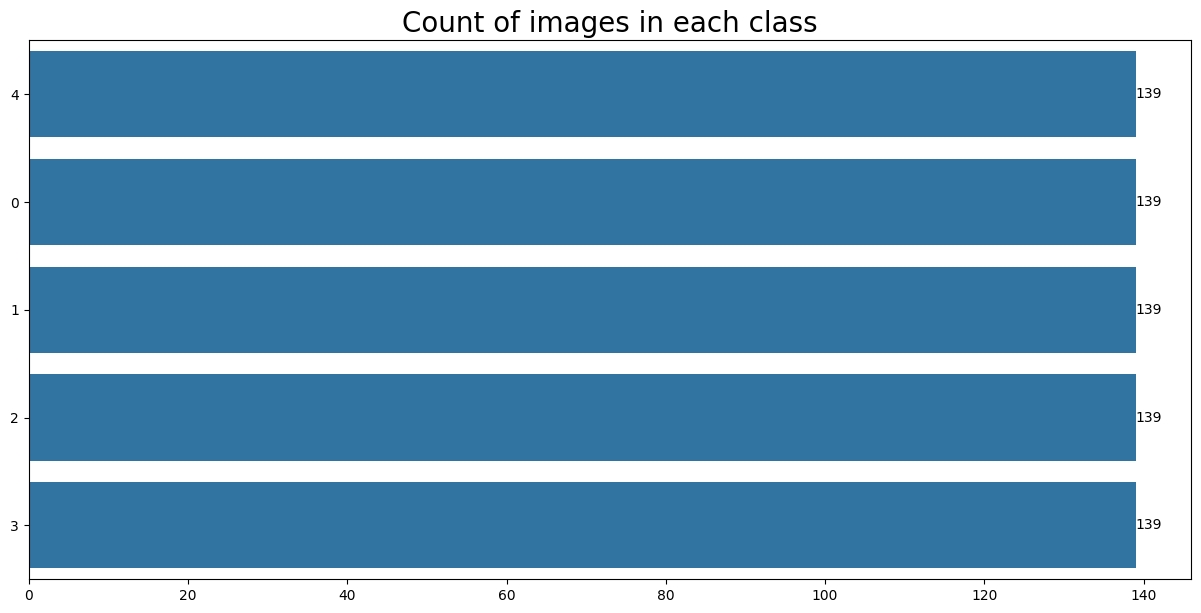

In [35]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=val_df , y=val_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

--- Showing samples from 'training' folder ---


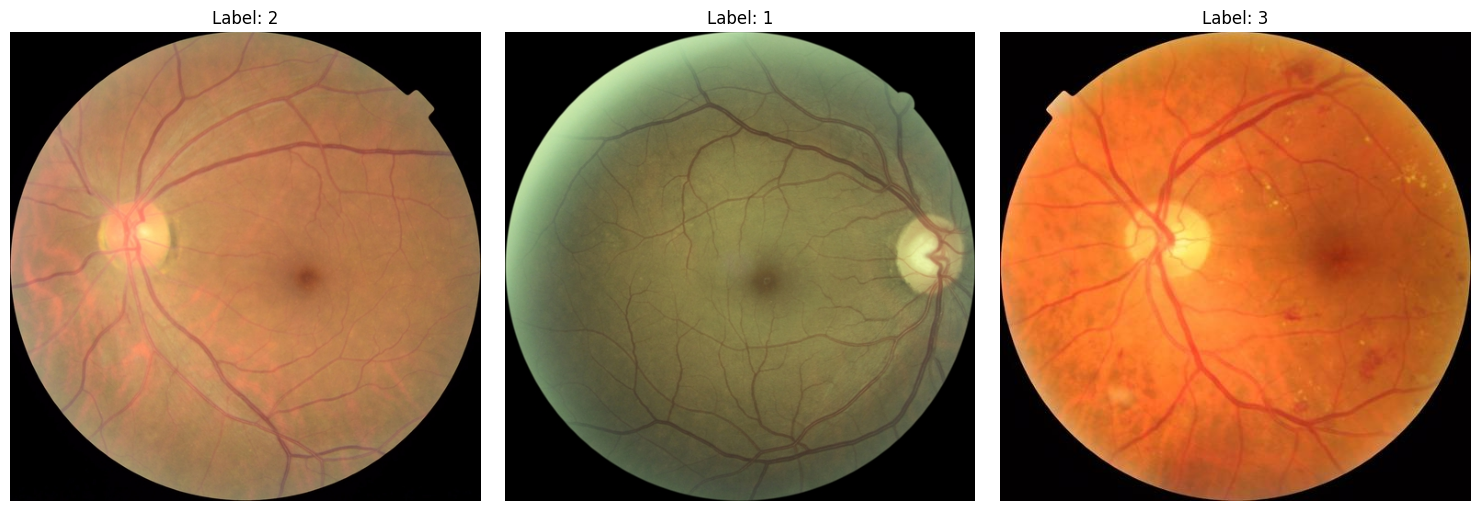

--- Showing samples from 'test' folder ---


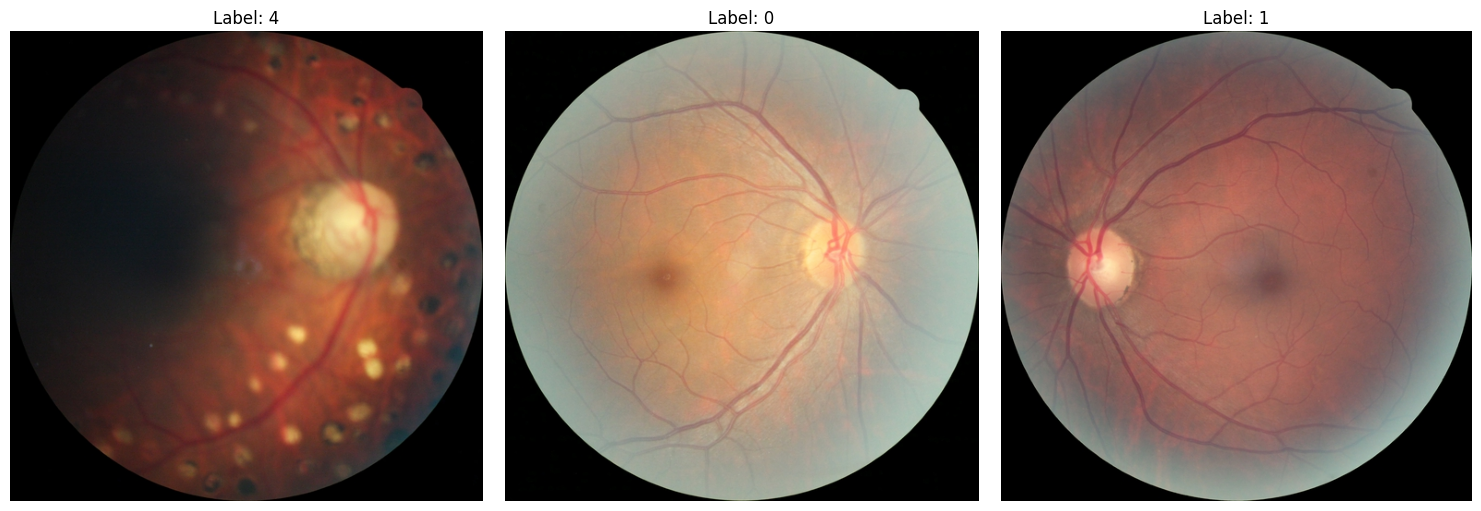

--- Showing samples from 'validation' folder ---


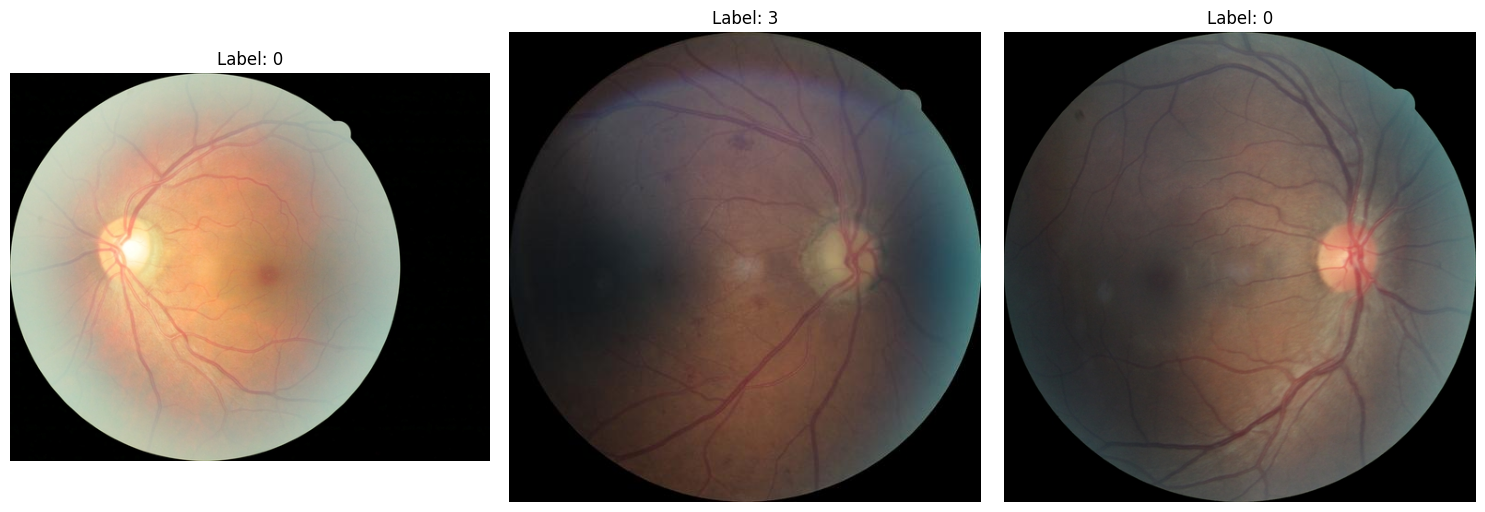

In [36]:
import os
import random
import cv2
from matplotlib import pyplot as plt

def show_sample_images(input_dir, num_samples=3):
    for folder in ['training', 'test', 'validation']:
        print(f"--- Showing samples from '{folder}' folder ---")

        folder_path = os.path.join(input_dir, folder)

        # Get all class subfolders
        class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

        if not class_folders:
            print(f"No class folders found in '{folder_path}'.")
            continue

        # Create a grid layout for subplots
        fig, axes = plt.subplots(1, num_samples, figsize=(5 * num_samples, 5))
        axes = axes.flatten()  # Flatten axes in case of a 2D grid

        # Randomly select class folders and images
        for i in range(num_samples):
            class_name = random.choice(class_folders)
            class_path = os.path.join(folder_path, class_name)
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            if not images:
                print(f"No images found in '{class_path}'.")
                continue

            image_name = random.choice(images)
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image on the corresponding subplot
            ax = axes[i]
            ax.imshow(image_rgb)
            ax.set_title(f"Label: {class_name}")
            ax.axis("off")

        # Adjust layout and show the grid of images
        plt.tight_layout()
        plt.show()

# Define the dataset directory
dataset_directory = "/content/diabetic"  # Replace with your dataset path

# Show sample images
show_sample_images(dataset_directory, num_samples=3)


In [37]:
data_dir = "/content/diabetic"


In [38]:
Name0 = os.listdir(data_dir)
Name0

['test', 'validation', 'train.csv', 'training']

In [39]:

model_checkpoint = "facebook/dinov2-base"

In [40]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00


In [41]:
from datasets import load_dataset

dataset = load_dataset('imagefolder',data_dir=data_dir)

Resolving data files:   0%|          | 0/5000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/695 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/705 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [42]:
dataset['train'].features['label']

ClassLabel(names=['0', '1', '2', '3', '4'], id=None)

In [43]:
dataset  = dataset.shuffle(seed=42)

In [44]:
example = dataset['train'][10]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x511>,
 'label': 3}

In [45]:
dataset['train'].features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['0', '1', '2', '3', '4'], id=None)}

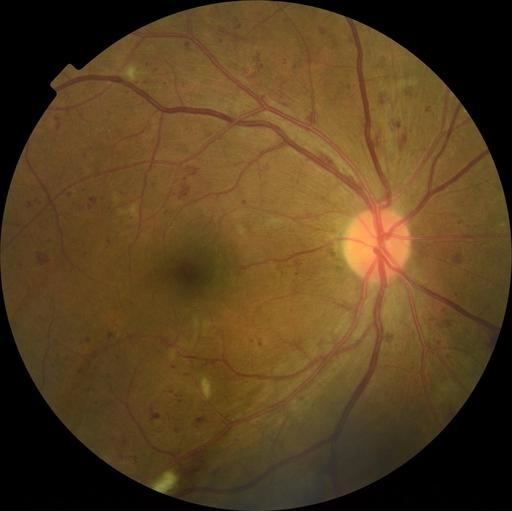

In [46]:
example['image']

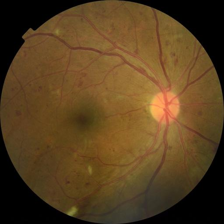

In [47]:
example['image'].resize((224,224))

In [48]:
example['label']

3

In [49]:
labels = dataset['train'].features['label'].names
labels

['0', '1', '2', '3', '4']

In [50]:
label2id,id2label = dict(),dict()
for i,label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label
id2label[2]

'2'

In [51]:
#prepare raw images for model input
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


BitImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "BitImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 256
  }
}

In [52]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
if "height" in image_processor.size:
    size = (image_processor.size["height"], image_processor.size["width"])
    crop_size = size
    max_size = None
elif "shortest_edge" in image_processor.size:
    size = image_processor.size["shortest_edge"]
    crop_size = (size, size)
    max_size = image_processor.size.get("longest_edge")

train_transforms = Compose(
        [
            RandomResizedCrop(crop_size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(crop_size),
            ToTensor(),
            normalize,
        ]
    )

test_transforms = Compose(
    [
        Resize(size),
        CenterCrop(size),
        ToTensor(),
        normalize,
    ]
)

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch
def preprocess_test(example_batch):
    example_batch['pixel_values'] = [val_transforms(image.convert("RGB")) for image in example_batch['image']]
    return example_batch

In [53]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 695
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 705
    })
})

In [54]:
splits = dataset['train'].train_test_split(test_size=0.2)

In [55]:
second_split = splits['test'].train_test_split(test_size=0.5)
second_split

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 500
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 500
    })
})

In [56]:
train_ds = splits['train']
val_ds= second_split['train']
test_ds = second_split['test']

In [57]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)
test_ds.set_transform(preprocess_test)

In [58]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x508>,
 'label': 0,
 'pixel_values': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -0.4911, -0.4911, -0.5253],
          [-2.1179, -2.1179, -2.1179,  ..., -0.4911, -0.4911, -0.4911],
          [-2.1179, -2.1179, -2.1008,  ..., -0.4739, -0.4911, -0.4911],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -0.8849, -0.8678, -0.8507],
          [-2.1179, -2.1179, -2.1179,  ..., -0.8849, -0.9020, -0.8678],
          [-2.1179, -2.1179, -2.1179,  ..., -0.9020, -0.9192, -0.8849]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -1.1429, -1.1429, -1.1429],
          [-2.0357, -2.0357, -2.0357,  ..., -1.1604, -1.1779, -1.1429],
          [-2.0357, -2.0357, -2.0182,  ..., -1.1429, -1.1429, -1.1429],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -1.2654, -1.2654, -1.2479],
          [-2.0357, -2.0357, -2.0357,  ..., -1.2479, -1.2479, -1.2304],
          [-2.0357, -2.0357, -2.0357,  ..., -1.2479, -1.2479, -1.2304]]

In [59]:
import warnings


from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)
warnings.filterwarnings("ignore")

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [60]:
model_name = model_checkpoint.split('/')[-1]


In [61]:
batch_size=4

In [62]:
args = TrainingArguments(
    f"{model_name}-finetuned-dia_eye",
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=10,
    # load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [63]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00


In [64]:
import evaluate

# Load the accuracy and F1 metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")



In [65]:
import numpy as np
def compute_metrics(eval_pred):
    """Computes accuracy, F1 score, and confusion matrix on a batch of predictions."""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    references = eval_pred.label_ids

    # Compute accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=references)['accuracy']

    # Compute F1 score
    f1 = f1_metric.compute(predictions=predictions, references=references, average="weighted")['f1']


    return {
        "accuracy": accuracy,
        "f1": f1,
    }

In [66]:
#is used to combine pixel values and their corresponding labels into a batch of data ready for training.
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example['pixel_values'] for example in examples])
    labels = torch.tensor([example['label'] for example in examples])
    return {'pixel_values':pixel_values,'labels':labels}

In [67]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn
)

In [68]:
train_results = trainer.train()


In [69]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =         10.0
  total_flos               = 3805143969GF
  train_loss               =       0.7868
  train_runtime            =   0:48:05.72
  train_samples_per_second =       13.861
  train_steps_per_second   =        0.866


In [70]:
metrics = trainer.evaluate()
trainer.log_metrics('eval',metrics)
trainer.save_metrics("eval",metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =       0.88
  eval_f1                 =     0.8802
  eval_loss               =     0.4215
  eval_runtime            = 0:00:12.30
  eval_samples_per_second =     40.641
  eval_steps_per_second   =      10.16


In [71]:
outputs = trainer.predict(test_ds)
print(outputs.metrics)

{'test_loss': 0.3781830072402954, 'test_accuracy': 0.876, 'test_f1': 0.8756710583620768, 'test_runtime': 13.1186, 'test_samples_per_second': 38.114, 'test_steps_per_second': 9.528}


In [72]:
torch.save(model.state_dict(), f='custom_weights.pt')

In [75]:
from huggingface_hub import notebook_login
notebook_login()

In [76]:
trainer.push_to_hub('Diabetic_RetinoPathy_detection')

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

events.out.tfevents.1742213635.8156a47f4473.351.1:   0%|          | 0.00/457 [00:00<?, ?B/s]

events.out.tfevents.1742210722.8156a47f4473.351.0:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/AsmaaElnagger/dinov2-base-finetuned-dia_eye/commit/61a582f5961648532a4a70f0fd8c89dc1cf832f1', commit_message='Diabetic_RetinoPathy_detection', commit_description='', oid='61a582f5961648532a4a70f0fd8c89dc1cf832f1', pr_url=None, repo_url=RepoUrl('https://huggingface.co/AsmaaElnagger/dinov2-base-finetuned-dia_eye', endpoint='https://huggingface.co', repo_type='model', repo_id='AsmaaElnagger/dinov2-base-finetuned-dia_eye'), pr_revision=None, pr_num=None)

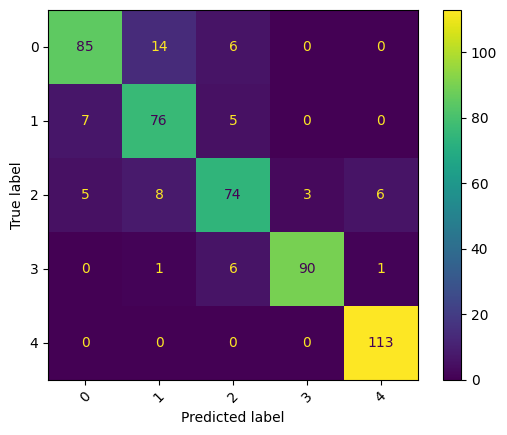

In [77]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
labels = train_ds.features['label'].names
cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(xticks_rotation=45)


In [78]:
from sklearn.metrics import recall_score

recall = recall_score(y_true,y_pred,average=None)
for label,score in zip(labels,recall):
    print(f"Recall for {label}: {score:.2f}")

Recall for 0: 0.81
Recall for 1: 0.86
Recall for 2: 0.77
Recall for 3: 0.92
Recall for 4: 1.00


In [79]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix


# Calculate precision and recall for each class
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

# Calculate specificity for each class
specificities = []
conf_matrix = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
for i, label in enumerate(labels):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Calculate overall metrics
overall_precision = precision_score(y_true, y_pred, average='weighted')
overall_recall = recall_score(y_true, y_pred, average='weighted')
overall_specificity = np.mean(specificities)  # Average specificity across all classes

# Print overall metrics
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall Specificity: {overall_specificity:.2f}")
print("************************************************************************************")

# Print precision, recall, and specificity for each label
for label, prec, rec, spec in zip(labels, precision, recall, specificities):
    print(f"Class '{label}': Precision = {prec:.2f}, Recall = {rec:.2f}, Specificity = {spec:.2f}")


Overall Precision: 0.88
Overall Recall: 0.88
Overall Specificity: 0.97
************************************************************************************
Class '0': Precision = 0.88, Recall = 0.81, Specificity = 0.97
Class '1': Precision = 0.77, Recall = 0.86, Specificity = 0.94
Class '2': Precision = 0.81, Recall = 0.77, Specificity = 0.96
Class '3': Precision = 0.97, Recall = 0.92, Specificity = 0.99
Class '4': Precision = 0.94, Recall = 1.00, Specificity = 0.98


In [80]:
predictions = trainer.predict(test_ds)

# Convert lists back to arrays for plotting
predictions_array = np.array(predictions.predictions)
references_array = np.array(predictions.label_ids)

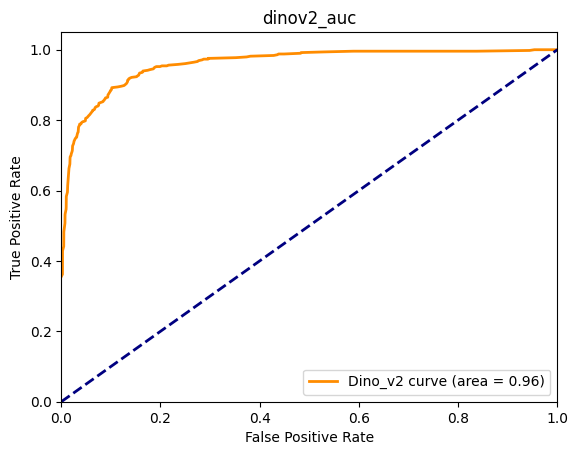

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming predictions_array contains the probability predictions for each class
# and references_array contains the true labels

# Binarize the output labels for multiclass setting
n_classes = predictions_array.shape[1]
references_array_bin = label_binarize(references_array, classes=range(n_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(references_array_bin[:, i], predictions_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_auc = auc(all_fpr, mean_tpr)

# Plot macro-averaged ROC curve
plt.figure()
plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2, label=f'Dino_v2 curve (area = {macro_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('dinov2_auc')
plt.legend(loc="lower right")
plt.show()


In [84]:
# Load model directly
from PIL import Image
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("AsmaaElnagger/Diabetic_RetinoPathy_detection")
model = AutoModelForImageClassification.from_pretrained("AsmaaElnagger/Diabetic_RetinoPathy_detection")
# Load an image
image_path = "/content/data/test/3/39756_left.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")  # Ensure it's in RGB format

# Preprocess the image
inputs = processor(images=image, return_tensors="pt") # return pythorch tensor

# Perform inference
with torch.no_grad(): #stop training
    outputs = model(**inputs)

# Get the predicted label
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_class = predictions.argmax().item()

# Map the predicted class index to a label
labels = model.config.id2label
predicted_label = labels[predicted_class]

print(f"Predicted label: {predicted_label}")


Predicted label: 3


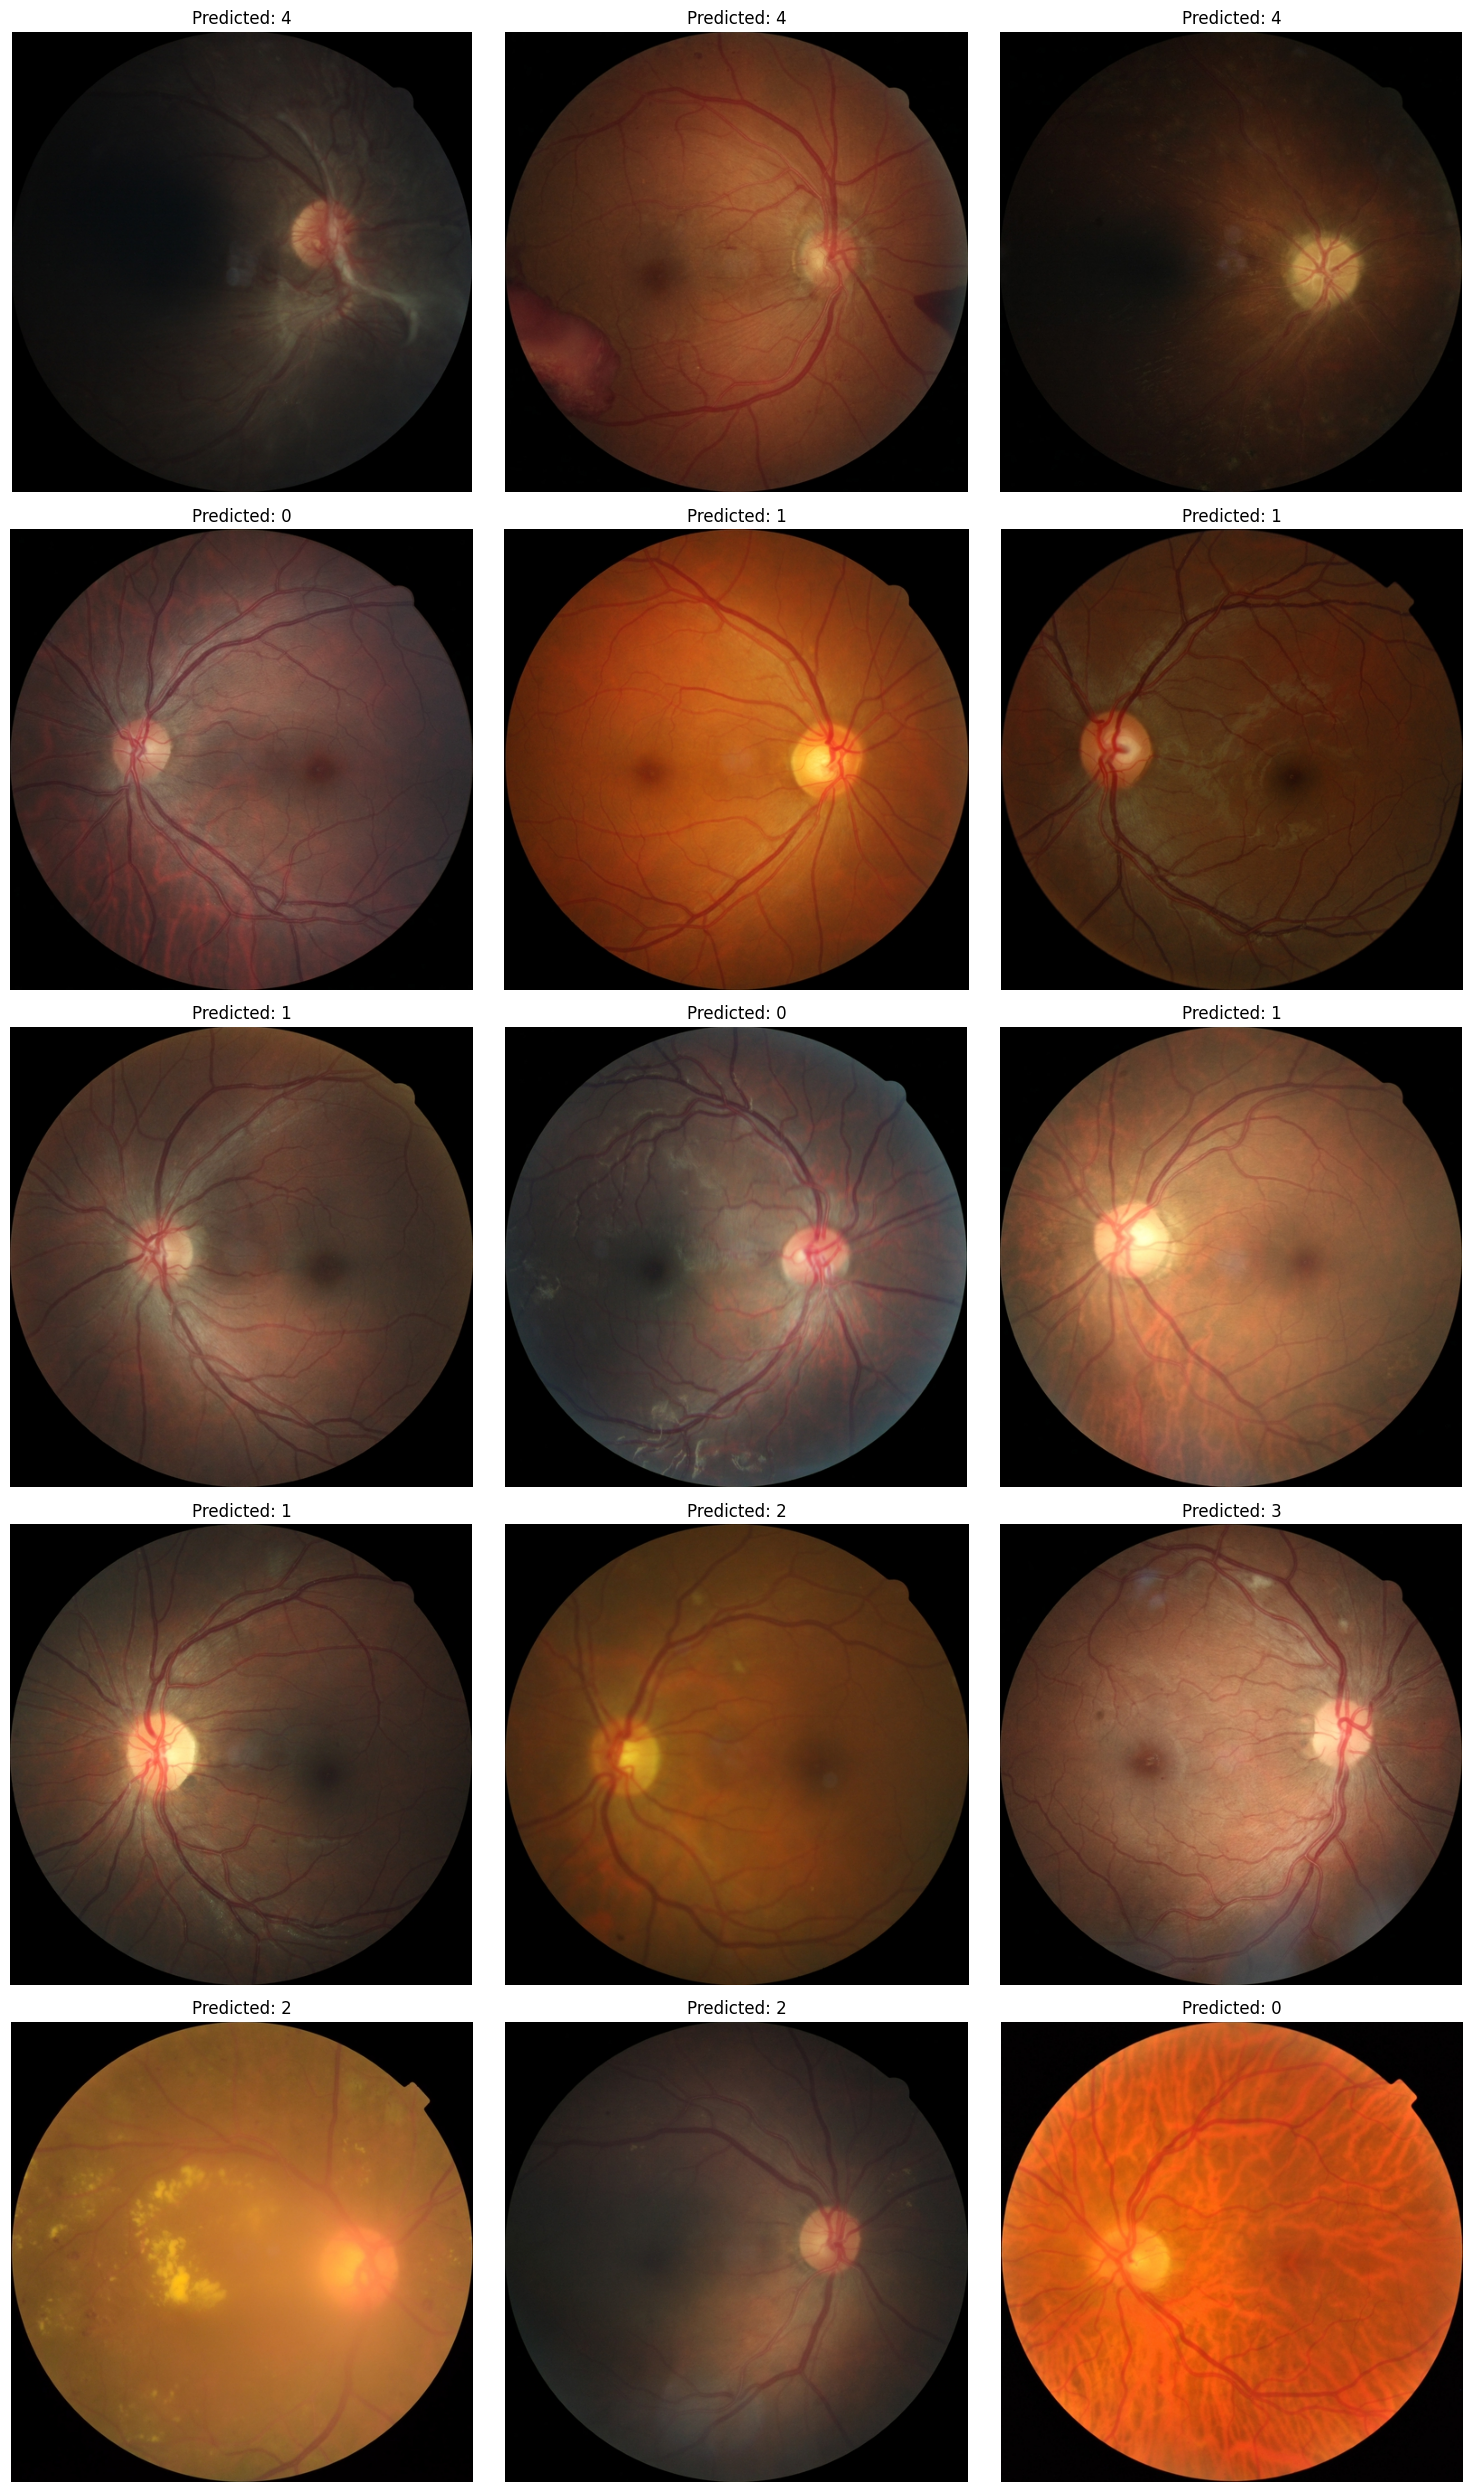

In [85]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import torch
from transformers import AutoProcessor, AutoModelForImageClassification

# Load the Hugging Face model and processor
model_name = "AsmaaElnagger/Diabetic_RetinoPathy_detection"  # Replace with your model
processor = AutoProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Define the folder path containing subfolders of classes
folder_path = "/content/data/test"  # Replace with your folder path

# Number of images to sample from each class
sample_count = 3

# Dictionary to store results
results = {}

# Collect images and predictions for each class
all_images = []
all_labels = []

for class_name in os.listdir(folder_path):
    class_folder = os.path.join(folder_path, class_name)
    if not os.path.isdir(class_folder):
        continue  # Skip if not a folder

    # Get a list of all images in the class folder
    image_files = [f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Randomly sample images from the class folder
    sampled_files = random.sample(image_files, min(len(image_files), sample_count))

    for file_name in sampled_files:
        image_path = os.path.join(class_folder, file_name)

        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"Skipping file {file_name} in class {class_name}: {e}")
            continue

        # Preprocess the image
        inputs = processor(images=image, return_tensors="pt")

        # Perform inference
        with torch.no_grad():
            outputs = model(**inputs)

        # Get predictions
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = predictions.argmax().item()
        predicted_label = model.config.id2label[predicted_class]

        # Store the result
        results[image_path] = predicted_label
        all_images.append((image, predicted_label))

# Display images and predictions in a grid
rows = len(all_images) // 3 + 1  # Adjust rows for the grid
cols = 3  # Number of columns
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for idx, (image, label) in enumerate(all_images):
    ax = axes[idx // cols, idx % cols]
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(f"Predicted: {label}")

# Hide empty subplots
for idx in range(len(all_images), rows * cols):
    fig.delaxes(axes[idx // cols, idx % cols])

plt.tight_layout()
plt.show()


In [87]:
all_data=dataset['train']
all_data.set_transform(preprocess_train)

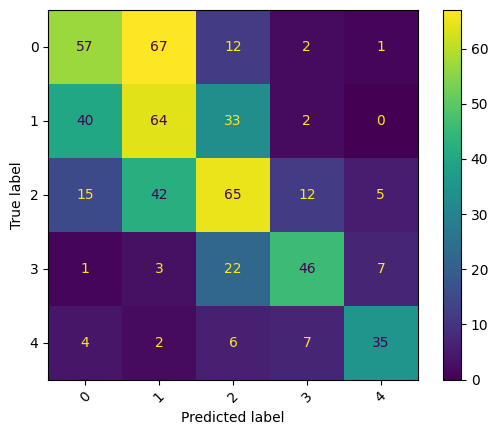

In [89]:
import os
from PIL import Image
import torch
from transformers import AutoProcessor, AutoModelForImageClassification, TrainingArguments, Trainer
from sklearn.metrics import classification_report
 import matplotlib.pyplot as plt
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_name = "AsmaaElnagger/Diabetic_RetinoPathy_detection"  # Replace with your model
processor = AutoProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

directories = ["/content/data/validation", "/content/data/tringing", "/content/data/testing"]
true_labels = []
predicted_labels = []

for folder_path in directories:
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        image_files = [f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
        for file_name in image_files:
            image_path = os.path.join(class_folder, file_name)

            try:
                image = Image.open(image_path).convert("RGB")
            except Exception as e:
                print(f"Skipping file {file_name} in class {class_name}: {e}")
                continue

            inputs = processor(images=image, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
            predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predicted_class = predictions.argmax().item()
            predicted_label = model.config.id2label[predicted_class]
            true_labels.append(class_name)
            predicted_labels.append(predicted_label)



label_names =all_data.features['label'].names
cm = confusion_matrix(true_labels, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(xticks_rotation=45, cmap="viridis")
plt.show()